### <center>Machine Learning </center>
### <center>Experiment No. 03: Feature Engineering</center>

**Aim:**  To Perform Feature Engineering by applying Data Preprocessing, Handling categorical data, Feature scaling and Feature transformation<br>
**Prerequisites:**   Python libraries like Pandas, Matplotlib, seaborn, Conceptual knowledge of Feature engineering<br>
**Outcomes:** After completion of this experiment students will be able to Feature Engineeing with the knowledge of:
              1. Handling missing data in numerical and categorical type features
              2. Transforming categorical data to numeric data
              3. performing Feature scaling
              4. Feature Transformation

### Pre-processing
Preprocessing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.In this experiment we will study how to handle missing values in data and how to deal with categorical data.
### Missing values
Missing values are representative of the messiness of real world data. There can be a multitude of reasons why they occur — ranging from human errors during data entry, incorrect sensor readings, to software bugs in the data processing pipeline. If you try to remove them, you might reduce the amount of data you have available dramatically — probably the worst that can happen in machine learning.
The first thing you can do is count how many you have and try to visualize their distributions. For this step to work properly you should manually inspect the data (or at least a subset of it) to try to determine how they are designated. Possible variations are: ‘NaN’, ‘NA’, ‘None’, ‘ ’, ‘?’ and others. If you have something different than ‘NaN’ you should standardize them by using np.nan. A standard and often very good approach is to replace the missing values with mean, median or mode. For numerical values you should go with mean, and if there are some outliers try median. If categorical values are there then it should be handled differently.The standard thing to do is to replace the missing entry with the most frequent one.
Let ue see how to it in following example:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset 'Toyaota.csv' and store it as cars DataFrame
cars=pd.read_csv('C:/Users/Swift 3/AppData/Local/Programs/Python/Python38/Toyota.csv',index_col=0)

In [3]:
# Get the information of each column in cars DataFrame
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 123.4+ KB


In [4]:
# Display first 10 rows of DataFrame
cars.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
7,18600,30.0,75889,NaN,90,1.0,0,2000,3,1245
8,21500,27.0,19700,Petrol,192,0.0,0,1800,3,1185
9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105


In [5]:
# Display the count of null values in each column
cars.isna().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [6]:
# ?? and ???? in any column is replaced by NaN.so that it will be counted in isna()
cars.replace(['??','????'],np.NaN,inplace=True)

In [7]:
# now check the count of null values again
cars.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [8]:
# Display basic statistical details of each column
cars.describe()

,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [9]:
# Get the dataframe of rows containing missing values in one or more columns
missing=cars[cars.isnull().any(axis=1)]
missing.shape
print(missing)

      Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  \
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3   
6     16900  27.0    NaN   Diesel  NaN       NaN          0  2000     3   
7     18600  30.0  75889      NaN   90       1.0          0  2000     3   
9     12950  23.0  71138   Diesel  NaN       NaN          0  1900     3   
15    22000  28.0  18739   Petrol  NaN       0.0          0  1800     3   
...     ...   ...    ...      ...  ...       ...        ...   ...   ...   
1428   8450  72.0    NaN   Petrol   86       NaN          0  1300     3   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3   
1432  10845  72.0    NaN   Petrol   86       0.0          0  1300     3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3   
1434   7250  70.0    NaN      NaN   86       1.0          0  1300     3   

      Weight  
2       1165  
6       1245  
7       1245  
9       1105  
15      1185  
...      

In [10]:
cars11=cars.copy()
cars11.shape

(1436, 10)

In [11]:
cars11.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [12]:
# Fill missing values in column by mean of that column if it contains numerical values
cars['Age'].fillna(cars['Age'].mean(),inplace=True)

In [13]:
# Display the count of null values in each column
cars.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

**Filling missing values in the column by mean using sklearn**<br>
Another way to replace missing values in a column is using imputation by using the SimpleImputer class provided by sklearn. As shown in below code line, strategy parameter indicates the data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(cars11[['Age']])
cars11['Age'] = imputer.transform(cars11[['Age']])

In [15]:
cars11.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [16]:
#'MetColor' column of cars DataFrame contains 150 null values.
# Replace these null values by 'mean' of this column 
cars['MetColor'].fillna(cars['MetColor'].mean(),inplace=True)

In [17]:
# Display the count of null values in each column
cars.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             6
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [18]:
# Fill missing values in 'MetColor' column using simple imputer


In [19]:
#'KM' column of cars DataFrame contains 15 null values.
# Replace these null values by 'median' of this column 
cars['KM'].fillna(cars['KM'].median(),inplace=True)

In [20]:
# Display the count of null values in each column
cars.isna().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             6
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [21]:
#Fill the missing values in 'KM' column by median using sklearn and verify it


In [22]:
#'HP' column of cars DataFrame contains 6 null values.
# Replace these null values by 'median' of this column
cars['HP'].fillna(cars['HP'].median(),inplace=True)

In [23]:
# Display the count of null values in each column and observe the output
cars.isna().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [24]:
#Output of above cell indicates that, 'FuelType' column of cars DataFrame contains 100 null values
# Find how many unique values are there in this column

cars['FuelType'].unique()

array(['Diesel', nan, 'Petrol', 'CNG'], dtype=object)

In [25]:
# counts of each unique values
#The values will be in descending order so that the first element is the most frequently occurring element
#Excludes NA values by default

cars['FuelType'].value_counts()
# As you can see, Petrol is occuring maximum no of types.
# Hence mode of 'FuelType' attribute (which is of categorical type), is 'Petrol' 
# whose index is 0 as it is given in descending order

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [26]:
# Replace null values in 'FuelType' column by most frequently occuring value
cars['FuelType'].fillna(cars['FuelType'].value_counts().index[0],inplace=True)

In [27]:
# Display the count of null values in each column to check if null values are removed from all features
cars.isna().sum()# null values are removed from all features

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [28]:
# filling the missing values at one stretch using lambda function
# If data type of column is float, replace null values by mean of the column
# if data type of column is categorical, replace null values by mode of the column
cars=cars.apply(lambda x: x.fillna(x.mean())if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [29]:
cars.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [30]:
# Create copies of data
cars_copy1=cars.copy()
cars_copy2=cars.copy()
cars_copy3=cars.copy()
cars_copy4=cars.copy()
cars_copy5=cars.copy()

<AxesSubplot:xlabel='FuelType', ylabel='count'>

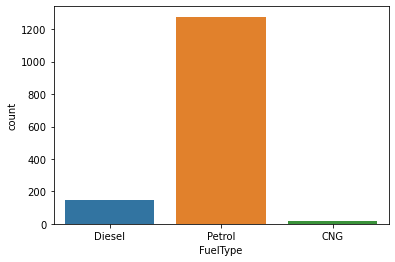

In [31]:
sns.countplot(x='FuelType',data=cars)# count the nuber of cars based on each fueltype

In [32]:
# Instead of above graph, we can also get count of vehicles based on FuelType by using pd.crosstab command
pd.crosstab(index=cars['FuelType'],columns='count')# computes a frequency table of a factors

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1277


In [33]:
pd.crosstab(index=cars['Automatic'],columns=cars['FuelType'])

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1197
1,0,0,80


<AxesSubplot:xlabel='Automatic', ylabel='count'>

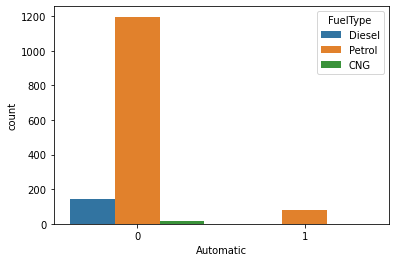

In [34]:
sns.countplot(x='Automatic',hue='FuelType',data=cars)# observe 'hue' parameter here and hence the output

<AxesSubplot:xlabel='FuelType', ylabel='count'>

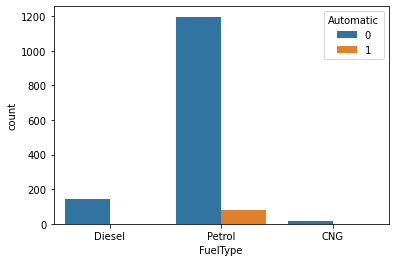

In [35]:
sns.countplot(x='FuelType',hue='Automatic',data=cars)

<AxesSubplot:xlabel='Doors', ylabel='count'>

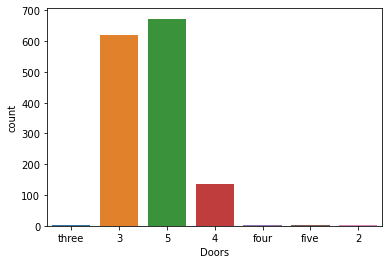

In [36]:
sns.countplot(x='Doors',data=cars)

In [37]:
# Create cars_num dataframe containing only integer type features (columns with integer and float data type only)
cars_num=cars.select_dtypes(exclude='object')

In [38]:
# check shape of this new dataframe
cars_num.shape

(1436, 6)

In [39]:
cars_num.corr()# correlation matrix to give correlation between different numeric features

,Price,Age,MetColor,Automatic,CC,Weight
Price,1.000000,-0.845111,0.107943,0.033081,0.165067,0.581198
Age,-0.845111,1.000000,-0.091331,0.030931,-0.116255,-0.442055
MetColor,0.107943,-0.091331,1.000000,-0.013167,0.027524,0.054952
Automatic,0.033081,0.030931,-0.013167,1.000000,-0.069321,0.057249
CC,0.165067,-0.116255,0.027524,-0.069321,1.000000,0.651450
Weight,0.581198,-0.442055,0.054952,0.057249,0.651450,1.000000


## Handling categorical features
Categorical features can only take on a limited, and usually fixed, number of possible values. For example, if a dataset is about information related to users, then you will typically find features like country, gender, age group, etc. Alternatively, if the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on. These are all categorical features in your dataset. Typically, any data attribute which is categorical in nature represents discrete values which belong to a specific finite set of categories or classes. These features are typically stored as text values which represent various traits of the observations. For example, gender is described as Male (M) or Female (F), product type could be described as electronics, apparels, food etc.
### Nominal and ordinal Features
Above type of features where the categories are only labeled without any order of precedence are called nominal features.
Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
For the machine, categorical data doesn’t contain the same context or information that humans can easily associate and understand. For example, when looking at a feature called City with three cities New York, New Jersey and New Delhi, humans can infer that New York is closely related to New Jersey as they are from same country, while New York and New Delhi are much different. But for the model, New York, New Jersey and New Delhi, are just three different levels (possible values) of the same feature City. If you don’t specify the additional contextual information, it will be impossible for the model to differentiate between highly different levels.

You therefore are faced with the challenge of figuring out how to turn these text values into numerical values for further processing and unmask lots of interesting information which these features might hide. Typically, any standard work-flow in feature engineering involves some form of transformation of these categorical values into numeric labels and then applying some encoding scheme on these values.
**The columns with object dtype are the possible categorical features in your dataset.**

One of the most common ways to analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot. The boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines at either side of the rectangle.

You can plot a boxplot by invoking .boxplot() on your DataFrame.

<AxesSubplot:title={'center':'Price'}, xlabel='FuelType'>

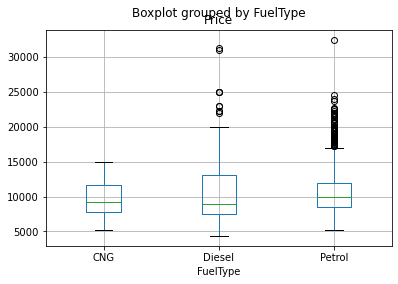

In [40]:
cars.boxplot('Price','FuelType')

In [41]:
#you might just want to encode a bunch of categories within a feature to some numeric value say 1 and 
#encode all the other categories to some other numeric value. say zero
cars['FuelType'] = np.where(cars['FuelType'].str.contains('CNG'), 1, 0)
cars.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,0,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,0,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,0,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,0,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,0,90,0.000000,0,2000,3,1170


### One Hot Encoding

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.Simplest method is using pandas' .get_dummies() method.

While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

Now, let’s see how to apply one-hot encoding in Python. Getting back to our example, in Python, this process can be implemented using 2 approaches as follows:

1. Using Pandas
2. scikit-learn library 


In [42]:
# 1. Using Pandas
# Nominal Features: using one hot encoding
FuelType=pd.get_dummies(cars_copy1['FuelType'])

In [43]:
FuelType

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [44]:
cars_copy1.drop(['FuelType'],axis=1,inplace=True)

In [45]:
cars_copy1.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,90,0.000000,0,2000,3,1170


In [46]:
cars_copy1=pd.concat([cars_copy1,FuelType],axis=1)

In [47]:
cars_copy1.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23.0,46986,90,1.000000,0,2000,three,1165,0,1,0
1,13750,23.0,72937,90,1.000000,0,2000,3,1165,0,1,0
2,13950,24.0,41711,90,0.674961,0,2000,3,1165,0,1,0
3,14950,26.0,48000,90,0.000000,0,2000,3,1165,0,1,0
4,13750,30.0,38500,90,0.000000,0,2000,3,1170,0,1,0


2. One hot encoding using sklearn


In [48]:
# one hot encoding using labelBinarizer in sklearn
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cars_copy4['FuelType'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
print(lb_results_df.head())
cars_copy2['lb_results']=lb_results

   CNG  Diesel  Petrol
0    0       1       0
1    0       1       0
2    0       1       0
3    0       1       0
4    0       1       0


ValueError: Wrong number of items passed 3, placement implies 1

In [49]:
cars_copy4.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [50]:
#One hot encoder only takes numerical categorical values, hence any value of string type 
#should be label encoded before one-hot encoded.
from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
enc = OneHotEncoder()
fuel=enc.fit_transform(cars_copy3[['FuelType']]).toarray()
fuel_df=pd.DataFrame(fuel)
#cars_copy3=cars_copy3.join(fuel_df)
cars_copy3=pd.concat([cars_copy3,fuel_df],axis=1)
#cars_copy3['FuelType']=columnTransformer.fit_transform(cars_copy3['FuelType'].to_array())
#pd.concat(cars_copy4,enc_results)
#cars_copy4['enc_results']=enc_results

In [51]:
cars_copy3.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,0,1,2
0,13500,23.0,46986,Diesel,90,1.000000,0,2000,three,1165,0.0,1.0,0.0
1,13750,23.0,72937,Diesel,90,1.000000,0,2000,3,1165,0.0,1.0,0.0
2,13950,24.0,41711,Diesel,90,0.674961,0,2000,3,1165,0.0,1.0,0.0
3,14950,26.0,48000,Diesel,90,0.000000,0,2000,3,1165,0.0,1.0,0.0
4,13750,30.0,38500,Diesel,90,0.000000,0,2000,3,1170,0.0,1.0,0.0
5,12950,32.0,61000,Diesel,90,0.000000,0,2000,3,1170,0.0,1.0,0.0
6,16900,27.0,63634,Diesel,110,0.674961,0,2000,3,1245,0.0,1.0,0.0
7,18600,30.0,75889,Petrol,90,1.000000,0,2000,3,1245,0.0,0.0,1.0
8,21500,27.0,19700,Petrol,192,0.000000,0,1800,3,1185,0.0,0.0,1.0
9,12950,23.0,71138,Diesel,110,0.674961,0,1900,3,1105,0.0,1.0,0.0


In [ ]:
cars_copy3.columns

### Label encoding :
In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4). After label encoding, the numeric value is assigned to each of the categorical values. You might be wondering why the numbering is not in sequence (Top-Down), and the answer is that the numbering is assigned in alphabetical order. 
Label Encoding can be performed in 2 ways namely:

1. Category codes
2. LabelEncoder class using scikit-learn library 

In [52]:
# Label encoding using category codes (cat.codes)
cars_copy2['FuelType'] = cars_copy2['FuelType'].astype('category')# object to category
cars_copy2['FuelType'] = cars_copy2['FuelType'].cat.codes
cars_copy2.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1.000000,0,2000,three,1165
1,13750,23.0,72937,1,90,1.000000,0,2000,3,1165
2,13950,24.0,41711,1,90,0.674961,0,2000,3,1165
3,14950,26.0,48000,1,90,0.000000,0,2000,3,1165
4,13750,30.0,38500,1,90,0.000000,0,2000,3,1170
5,12950,32.0,61000,1,90,0.000000,0,2000,3,1170
6,16900,27.0,63634,1,110,0.674961,0,2000,3,1245
7,18600,30.0,75889,2,90,1.000000,0,2000,3,1245
8,21500,27.0,19700,2,192,0.000000,0,1800,3,1185
9,12950,23.0,71138,1,110,0.674961,0,1900,3,1105


In [53]:
cars_copy2.tail(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1426,9950,78.000000,30964,2,110,0.674961,1,1600,3,1080
1427,8950,55.672156,29000,2,86,1.000000,1,1300,3,1045
1428,8450,72.000000,63634,2,86,0.674961,0,1300,3,1015
1429,8950,78.000000,24000,2,86,1.000000,1,1300,5,1065
1430,8450,80.000000,23000,2,86,0.000000,0,1300,3,1015
1431,7500,55.672156,20544,2,86,1.000000,0,1300,3,1025
1432,10845,72.000000,63634,2,86,0.000000,0,1300,3,1015
1433,8500,55.672156,17016,2,86,0.000000,0,1300,3,1015
1434,7250,70.000000,63634,2,86,1.000000,0,1300,3,1015
1435,6950,76.000000,1,2,110,0.000000,0,1600,5,1114


In [54]:
cars_copy3['FuelType'].head()

0    Diesel
1    Diesel
2    Diesel
3    Diesel
4    Diesel
Name: FuelType, dtype: object

In [55]:
cars_copy3.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
0            0
1            0
2            0
dtype: int64

In [56]:
# Label encoding using sklearn labelencoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
cars_copy3['FuelType'] = lb_make.fit_transform(cars_copy3['FuelType'])
cars_copy3.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,0,1,2
0,13500,23.0,46986,1,90,1.000000,0,2000,three,1165,0.0,1.0,0.0
1,13750,23.0,72937,1,90,1.000000,0,2000,3,1165,0.0,1.0,0.0
2,13950,24.0,41711,1,90,0.674961,0,2000,3,1165,0.0,1.0,0.0
3,14950,26.0,48000,1,90,0.000000,0,2000,3,1165,0.0,1.0,0.0
4,13750,30.0,38500,1,90,0.000000,0,2000,3,1170,0.0,1.0,0.0


In [ ]:
cars_copy3.tail(7)

In [ ]:
cars_copy3['FuelType'].head(6)

### Feature Scaling
One of the most important transformations you need to apply to your data is feature  scaling. With few exceptions, Machine Learning algorithms don’t perform well when  the input numerical attributes have very different scales.   
Feature Scaling or Standardization is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.
There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

#### Min-max scaling 
In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:   Xnorm=(X−Xmin)/ (Xmax−Xmin)

#### Standardization
The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1   where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows: z= (x−μσ)
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.

package 'sklearn.preprocessing' is used for Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_cars=pd.DataFrame(scaler.fit_transform(cars_copy3[['Price','KM']]),columns=[['Price','KM']])
print(new_cars.head())

In [ ]:
print(new_cars.shape)
new_cars.head()

In [ ]:
len(new_cars)

In [ ]:
#plt.hist(new_cars,bins=20)

In [ ]:
new_cars.hist(figsize=(10,10))

In [ ]:
#plt.hist(new_cars[:,0],bins=20)

In [ ]:
#plt.hist(new_cars[:,1],bins=20)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
new_cars1=pd.DataFrame(min_max.fit_transform(cars_copy3[['Age','KM']]),columns=[['Age','KM']])
print(new_cars1.head())
print(new_cars1.shape)

In [ ]:
new_cars1.hist(figsize=(10,10))

Feature engineering is an essential part of building an intelligent system. Feature Engineering is an art as well as a science, this is the reason a typical data scientist spends 70 – 80% of his time cleaning and preparing the data which can improve model quality.
Feature engineering is a process of using domain knowledge to create/extract new features from a given dataset by using data mining techniques. It helps machine learning algorithms to understand data and determine patterns that can improve the performance of machine learning algorithms.

In [ ]:
cars_copy3.hist(figsize=(15,15))

### Logarithm transformation (or log transform) 
It is one of the most commonly used mathematical transformations in feature engineering. Here are the benefits of using log transform:

It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal
It also decreases the effect of the outliers due to the normalization of magnitude differences and the model become more robust
The data you apply log transform to must have only positive values, otherwise you receive an error

In [ ]:
#Log Transformation
import pylab
import scipy.stats as stat

plt.subplot(1,3,1)
(cars_copy3['Age']).plot.hist(bins = 20, figsize = (10,6), edgecolor = 'white')
plt.xlabel('Age', fontsize = 12)
plt.title('Age without transformation', fontsize = 18)

plt.subplot(1,3,2)
np.log(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')
plt.xlabel('Age', fontsize = 12)
plt.title('Transformed Age', fontsize =18)

# qq plot is used to check if an attribute is following normal distribution or not.
# if we get straight line in QQ plot, it means attribute is following normal distribution
plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)


### Square root transformation 

Itcan be useful for:

1. Normalizing a skewed distribution
2. Transforming a non-linear relationship between 2 variables into a linear one
3. Reducing heteroscedasticity of the residuals in linear regression
4. Focusing on visualizing certain parts of your data

In [ ]:
# Square root Transformation
plt.subplot(1,3,1)
(cars_copy3['Age']).plot.hist(bins = 20, figsize = (10,6), edgecolor = 'white')
plt.xlabel('Age', fontsize = 12)
plt.title('Age without transformation', fontsize = 18)

plt.subplot(1,3,2)
cars_copy3['Age']=cars_copy3['Age']**(1/2)
(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')
plt.xlabel('Age', fontsize = 12)
plt.title('Transformed Age', fontsize =18)

plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)

### Box cox transformation 
It is defined as a way to transform non-normal dependent variables in our data to a normal shape through which we can run a lot more tests than we could have.

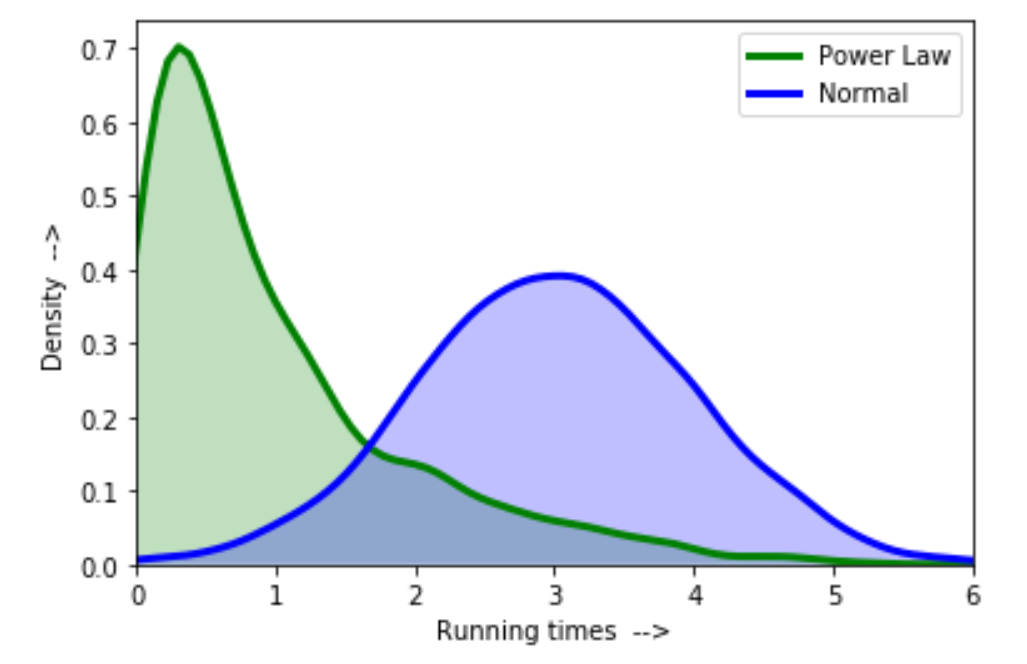

In [ ]:
# boxcox transformation
import scipy.stats as stat
cars_copy3['Age'],parameters=stat.boxcox(cars_copy3['Age'])
(cars_copy3['Age']).plot.hist(bins =20, figsize = (10,6), edgecolor = 'white', color = 'r')



In [ ]:
plt.subplot(1,3,3)
stat.probplot(cars_copy3['Age'],dist='norm',plot=pylab)# this transformation gives considerably straight line in QQ plot

### Exercise
1. Plot the visual representation of correlation matrix obtained using cars_num.corr() command in above code.
2. Try all possible parameters for command used in Q.1
3. Can you use simpleImputer in sklearn on multiple features simultaneously? If yes, try it with above dataset.

### Observation and Learning

### Conclusion